In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image, display
%matplotlib inline
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve, auc,confusion_matrix
import numpy as np


In [4]:
df = pd.DataFrame(pd.read_excel("/content/drive/MyDrive/Colab Notebooks/FinHack/train_bureau.xlsx"))
df.head()

,ID,SELF-INDICATOR,MATCH-TYPE,ACCT-TYPE,CONTRIBUTOR-TYPE,DATE-REPORTED,OWNERSHIP-IND,ACCOUNT-STATUS,DISBURSED-DT,CLOSE-DT,LAST-PAYMENT-DATE,CREDIT-LIMIT/SANC AMT,DISBURSED-AMT/HIGH CREDIT,INSTALLMENT-AMT,CURRENT-BAL,INSTALLMENT-FREQUENCY,OVERDUE-AMT,WRITE-OFF-AMT,ASSET_CLASS,REPORTED DATE - HIST,DPD - HIST,CUR BAL - HIST,AMT OVERDUE - HIST,AMT PAID - HIST,TENURE
0,1,False,PRIMARY,Overdraft,NAB,2018-04-30,Individual,Delinquent,2015-10-05,NaN,2018-02-27,NaN,"37,352",NaN,"37,873",NaN,"37,873",0.0,Standard,"20180430,20180331,",030000,"37873,12820,","37873,,",",,",NaN
1,1,False,PRIMARY,Auto Loan (Personal),NAB,2019-12-31,Individual,Active,2018-03-19,NaN,2019-12-19,NaN,"44,000","1,405/Monthly","20,797",F03,NaN,0.0,Standard,"20191231,20191130,20191031,20190930,20190831,2...",0000000000000000000000000000000000000000000000...,"20797,21988,23174,24341,25504,26648,27780,2891...",",,,,,,,,,,,,,,,,,,,,1452,,",",,,,,,,,,,,,,,,,,,,,,,",36.0
2,1,True,PRIMARY,Tractor Loan,NBF,2020-01-31,Individual,Active,2019-08-30,NaN,NaT,NaN,"1,45,000",NaN,"1,16,087",NaN,0,0.0,NaN,"20200131,20191231,20191130,20191031,20190930,2...",000000000000000000,"116087,116087,145000,145000,145000,145000,","0,0,0,0,0,0,",",,,,,,",NaN
3,1,True,PRIMARY,Auto Loan (Personal),NBF,2017-09-30,Individual,Closed,2013-09-27,2017-09-21 00:00:00,NaT,NaN,"3,00,000",NaN,0,NaN,0,0.0,NaN,"20170930,20170801,20170731,20170630,20170531,2...",000DDD0270260270260270240270270000320000000000...,"0,,15925,23754,31494,39147,46713,54194,61590,6...","0,,1014,1014,1014,1014,1014,1014,1014,983,0,92...",",,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,",NaN
4,1,True,PRIMARY,Tractor Loan,NBF,2016-02-29,Individual,Closed,2012-02-10,2016-02-01 00:00:00,NaT,NaN,"2,75,000",NaN,0,NaN,0,0.0,NaN,"20160229,20160131,20151231,20151130,20151031,2...",0000000000000000000000000000000000000000000000...,"0,0,23658,23321,22989,46321,45662,45012,68030,...","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...",",,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,",NaN


In [5]:
df1 = pd.DataFrame(pd.read_excel("/content/drive/MyDrive/Colab Notebooks/FinHack/train_Data.xlsx"))
df1.head()

,ID,Frequency,InstlmentMode,LoanStatus,PaymentMode,BranchID,Area,Tenure,AssetCost,AmountFinance,DisbursalAmount,EMI,DisbursalDate,MaturityDAte,AuthDate,AssetID,ManufacturerID,SupplierID,LTV,SEX,AGE,MonthlyIncome,City,State,ZiPCODE,Top-up Month
0,1,Monthly,Arrear,Closed,PDC_E,1,NaN,48,450000,275000.0,275000.0,24000.0,2012-02-10,2016-01-15,2012-02-10,4022465,1568,21946,61.11,M,49.0,35833.33,RAISEN,MADHYA PRADESH,464993.0,> 48 Months
1,2,Monthly,Advance,Closed,PDC,333,BHOPAL,47,485000,350000.0,350000.0,10500.0,2012-03-31,2016-02-15,2012-03-31,4681175,1062,34802,70.00,M,23.0,666.67,SEHORE,MADHYA PRADESH,466001.0,No Top-up Service
2,3,Quatrly,Arrear,Active,Direct Debit,1,NaN,68,690000,519728.0,519728.0,38300.0,2017-06-17,2023-02-10,2017-06-17,25328146,1060,127335,69.77,M,39.0,45257.00,BHOPAL,MADHYA PRADESH,462030.0,12-18 Months
3,7,Monthly,Advance,Closed,Billed,125,GUNA,48,480000,400000.0,400000.0,11600.0,2013-11-29,2017-11-10,2013-11-29,13021591,1060,25094,80.92,M,24.0,20833.33,ASHOK NAGAR,MADHYA PRADESH,473335.0,> 48 Months
4,8,Monthly,Arrear,Closed,Billed,152,BILASPUR,44,619265,440000.0,440000.0,15000.0,2011-12-08,2015-07-05,2011-12-08,3291320,1046,21853,71.05,M,56.0,27313.67,BILASPUR,CHATTISGARH,495442.0,36-48 Months


In [6]:
final_data = df1.merge(df, on="ID", how = 'left')

In [7]:
final_data.head(20)

,ID,Frequency,InstlmentMode,LoanStatus,PaymentMode,BranchID,Area,Tenure,AssetCost,AmountFinance,DisbursalAmount,EMI,DisbursalDate,MaturityDAte,AuthDate,AssetID,ManufacturerID,SupplierID,LTV,SEX,AGE,MonthlyIncome,City,State,ZiPCODE,Top-up Month,SELF-INDICATOR,MATCH-TYPE,ACCT-TYPE,CONTRIBUTOR-TYPE,DATE-REPORTED,OWNERSHIP-IND,ACCOUNT-STATUS,DISBURSED-DT,CLOSE-DT,LAST-PAYMENT-DATE,CREDIT-LIMIT/SANC AMT,DISBURSED-AMT/HIGH CREDIT,INSTALLMENT-AMT,CURRENT-BAL,INSTALLMENT-FREQUENCY,OVERDUE-AMT,WRITE-OFF-AMT,ASSET_CLASS,REPORTED DATE - HIST,DPD - HIST,CUR BAL - HIST,AMT OVERDUE - HIST,AMT PAID - HIST,TENURE
0,1,Monthly,Arrear,Closed,PDC_E,1,NaN,48,450000,275000.0,275000.0,24000.0,2012-02-10,2016-01-15,2012-02-10,4022465,1568,21946,61.11,M,49.0,35833.33,RAISEN,MADHYA PRADESH,464993.0,> 48 Months,False,PRIMARY,Overdraft,NAB,2018-04-30,Individual,Delinquent,2015-10-05,NaN,2018-02-27,NaN,"37,352",NaN,"37,873",NaN,"37,873",0.0,Standard,"20180430,20180331,",030000,"37873,12820,","37873,,",",,",NaN
1,1,Monthly,Arrear,Closed,PDC_E,1,NaN,48,450000,275000.0,275000.0,24000.0,2012-02-10,2016-01-15,2012-02-10,4022465,1568,21946,61.11,M,49.0,35833.33,RAISEN,MADHYA PRADESH,464993.0,> 48 Months,False,PRIMARY,Auto Loan (Personal),NAB,2019-12-31,Individual,Active,2018-03-19,NaN,2019-12-19,NaN,"44,000","1,405/Monthly","20,797",F03,NaN,0.0,Standard,"20191231,20191130,20191031,20190930,20190831,2...",0000000000000000000000000000000000000000000000...,"20797,21988,23174,24341,25504,26648,27780,2891...",",,,,,,,,,,,,,,,,,,,,1452,,",",,,,,,,,,,,,,,,,,,,,,,",36.0
2,1,Monthly,Arrear,Closed,PDC_E,1,NaN,48,450000,275000.0,275000.0,24000.0,2012-02-10,2016-01-15,2012-02-10,4022465,1568,21946,61.11,M,49.0,35833.33,RAISEN,MADHYA PRADESH,464993.0,> 48 Months,True,PRIMARY,Tractor Loan,NBF,2020-01-31,Individual,Active,2019-08-30,NaN,NaT,NaN,"1,45,000",NaN,"1,16,087",NaN,0,0.0,NaN,"20200131,20191231,20191130,20191031,20190930,2...",000000000000000000,"116087,116087,145000,145000,145000,145000,","0,0,0,0,0,0,",",,,,,,",NaN
3,1,Monthly,Arrear,Closed,PDC_E,1,NaN,48,450000,275000.0,275000.0,24000.0,2012-02-10,2016-01-15,2012-02-10,4022465,1568,21946,61.11,M,49.0,35833.33,RAISEN,MADHYA PRADESH,464993.0,> 48 Months,True,PRIMARY,Auto Loan (Personal),NBF,2017-09-30,Individual,Closed,2013-09-27,2017-09-21 00:00:00,NaT,NaN,"3,00,000",NaN,0,NaN,0,0.0,NaN,"20170930,20170801,20170731,20170630,20170531,2...",000DDD0270260270260270240270270000320000000000...,"0,,15925,23754,31494,39147,46713,54194,61590,6...","0,,1014,1014,1014,1014,1014,1014,1014,983,0,92...",",,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,",NaN
4,1,Monthly,Arrear,Closed,PDC_E,1,NaN,48,450000,275000.0,275000.0,24000.0,2012-02-10,2016-01-15,2012-02-10,4022465,1568,21946,61.11,M,49.0,35833.33,RAISEN,MADHYA PRADESH,464993.0,> 48 Months,True,PRIMARY,Tractor Loan,NBF,2016-02-29,Individual,Closed,2012-02-10,2016-02-01 00:00:00,NaT,NaN,"2,75,000",NaN,0,NaN,0,0.0,NaN,"20160229,20160131,20151231,20151130,20151031,2...",0000000000000000000000000000000000000000000000...,"0,0,23658,23321,22989,46321,45662,45012,68030,...","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...",",,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,",NaN
5,1,Monthly,Arrear,Closed,PDC_E,1,NaN,48,450000,275000.0,275000.0,24000.0,2012-02-10,2016-01-15,2012-02-10,4022465,1568,21946,61.11,M,49.0,35833.33,RAISEN,MADHYA PRADESH,464993.0,> 48 Months,False,PRIMARY,Credit Card,NAB,2018-04-30,Individual,Closed,2018-01-11,2018-03-13 00:00:00,NaT,"50,000",0,NaN,0,NaN,NaN,0.0,Standard,"20180331,20180228,20180131,",000000000,"24650,17300,0,",",,,",",,,,",NaN
6,1,Monthly,Arrear,Closed,PDC_E,1,NaN,48,450000,275000.0,275000.0,24000.0,2012-02-10,2016-01-15,2012-02-10,4022465,1568,21946,61.11,M,49.0,35833.33,RAISEN,MADHYA PRADESH,464993.0,> 48 Months,False,PRIMARY,Auto Loan (Personal),NAB,2019-12-31,Individual,Active,2018-11-15,NaN,2019-12-15,NaN,"5,00,000","7,934/Monthly","4,43,769",F03,NaN,0.0,Standard,"20191231,20191130,20191031,20190930,20190831,2...",000000000000000000000000000000000000000000,"

In [8]:
final_data.describe()

,ID,BranchID,Tenure,AssetCost,AmountFinance,DisbursalAmount,EMI,AssetID,ManufacturerID,SupplierID,LTV,AGE,MonthlyIncome,ZiPCODE,WRITE-OFF-AMT,TENURE
count,560844.000000,560844.000000,560844.000000,5.608440e+05,5.608440e+05,5.608440e+05,560844.000000,5.608440e+05,560844.000000,560844.000000,560844.000000,558734.000000,5.585020e+05,559189.000000,5.417210e+05,192737.000000
mean,67401.698360,154.640700,42.093955,5.615481e+05,3.590624e+05,3.587619e+05,58094.322021,1.566317e+07,1166.448547,53019.054971,60.326392,40.926604,5.152248e+04,441374.561465,2.956319e+02,28.801029
std,41016.177296,112.155494,22.955567,1.173511e+05,1.067093e+05,1.065242e+05,29524.712648,9.379569e+06,254.953137,34853.510833,14.939939,10.939845,8.304818e+05,161763.774494,1.950165e+04,32.170975
min,1.000000,1.000000,5.000000,2.000000e+05,5.000000e+04,2.894000e+03,0.000000,4.222710e+05,1019.000000,5879.000000,-1.380000,18.000000,0.000000e+00,110000.000000,-3.000000e+01,0.000000
25%,32434.000000,50.000000,36.000000,5.050000e+05,3.000000e+05,3.000000e+05,35585.000000,8.194716e+06,1046.000000,23980.000000,50.850000,33.000000,2.650000e+04,360579.000000,0.000000e+00,12.000000
50%,61399.000000,137.000000,36.000000,5.600000e+05,3.520610e+05,3.520000e+05,62800.000000,1.437195e+07,1062.000000,35721.000000,61.830000,40.000000,4.000000e+04,480994.000000,0.000000e+00,23.000000
75%,101283.250000,265.000000,48.000000,6.150000e+05,4.219070e+05,4.212170e+05,75900.000000,2.451524e+07,1186.000000,80704.000000,71.430000,48.000000,5.616667e+04,523240.000000,0.000000e+00,36.000000
max,143395.000000,424.000000,501.000000,2.250000e+06,1.308351e+06,1.308351e+06,460000.000000,3.706667e+07,3473.000000,145518.000000,100.000000,90.000000,6.174775e+08,855456.000000,8.797356e+06,856.000000


In [9]:
#checking the shape of the data
final_data.shape

(560844, 50)

In [10]:
#checking for dtypes
final_data.dtypes

ID                                    int64
Frequency                            object
InstlmentMode                        object
LoanStatus                           object
PaymentMode                          object
BranchID                              int64
Area                                 object
Tenure                                int64
AssetCost                             int64
AmountFinance                       float64
DisbursalAmount                     float64
EMI                                 float64
DisbursalDate                datetime64[ns]
MaturityDAte                 datetime64[ns]
AuthDate                     datetime64[ns]
AssetID                               int64
ManufacturerID                        int64
SupplierID                            int64
LTV                                 float64
SEX                                  object
AGE                                 float64
MonthlyIncome                       float64
City                            

## **Exploratory data analysis**

In [11]:
#check if there are any null values
final_data.isnull().sum()

ID                                0
Frequency                         0
InstlmentMode                     0
LoanStatus                        0
PaymentMode                       0
BranchID                          0
Area                          45456
Tenure                            0
AssetCost                         0
AmountFinance                     0
DisbursalAmount                   0
EMI                               0
DisbursalDate                     0
MaturityDAte                      2
AuthDate                          0
AssetID                           0
ManufacturerID                    0
SupplierID                        0
LTV                               0
SEX                            2110
AGE                            2110
MonthlyIncome                  2342
City                          47635
State                             0
ZiPCODE                        1655
Top-up Month                      0
SELF-INDICATOR                    0
MATCH-TYPE                  

In [12]:
a = []
for i in final_data['CONTRIBUTOR-TYPE'].unique():
  a.extend(str(i).split('|'))
  a = list(set(a))
  # print(f"{a[i]} : {a.count(a[i])}}")
print(a)
print(len(a))

['MFI', 'RRB', 'FRB', 'NAB', 'SFB', 'HFC', 'ARC', 'PRB', 'CCC', 'NBF', 'OFI', 'COP']
12


In [13]:
d_f = final_data.copy()

In [14]:
d_f.head()

,ID,Frequency,InstlmentMode,LoanStatus,PaymentMode,BranchID,Area,Tenure,AssetCost,AmountFinance,DisbursalAmount,EMI,DisbursalDate,MaturityDAte,AuthDate,AssetID,ManufacturerID,SupplierID,LTV,SEX,AGE,MonthlyIncome,City,State,ZiPCODE,Top-up Month,SELF-INDICATOR,MATCH-TYPE,ACCT-TYPE,CONTRIBUTOR-TYPE,DATE-REPORTED,OWNERSHIP-IND,ACCOUNT-STATUS,DISBURSED-DT,CLOSE-DT,LAST-PAYMENT-DATE,CREDIT-LIMIT/SANC AMT,DISBURSED-AMT/HIGH CREDIT,INSTALLMENT-AMT,CURRENT-BAL,INSTALLMENT-FREQUENCY,OVERDUE-AMT,WRITE-OFF-AMT,ASSET_CLASS,REPORTED DATE - HIST,DPD - HIST,CUR BAL - HIST,AMT OVERDUE - HIST,AMT PAID - HIST,TENURE
0,1,Monthly,Arrear,Closed,PDC_E,1,NaN,48,450000,275000.0,275000.0,24000.0,2012-02-10,2016-01-15,2012-02-10,4022465,1568,21946,61.11,M,49.0,35833.33,RAISEN,MADHYA PRADESH,464993.0,> 48 Months,False,PRIMARY,Overdraft,NAB,2018-04-30,Individual,Delinquent,2015-10-05,NaN,2018-02-27,NaN,"37,352",NaN,"37,873",NaN,"37,873",0.0,Standard,"20180430,20180331,",030000,"37873,12820,","37873,,",",,",NaN
1,1,Monthly,Arrear,Closed,PDC_E,1,NaN,48,450000,275000.0,275000.0,24000.0,2012-02-10,2016-01-15,2012-02-10,4022465,1568,21946,61.11,M,49.0,35833.33,RAISEN,MADHYA PRADESH,464993.0,> 48 Months,False,PRIMARY,Auto Loan (Personal),NAB,2019-12-31,Individual,Active,2018-03-19,NaN,2019-12-19,NaN,"44,000","1,405/Monthly","20,797",F03,NaN,0.0,Standard,"20191231,20191130,20191031,20190930,20190831,2...",0000000000000000000000000000000000000000000000...,"20797,21988,23174,24341,25504,26648,27780,2891...",",,,,,,,,,,,,,,,,,,,,1452,,",",,,,,,,,,,,,,,,,,,,,,,",36.0
2,1,Monthly,Arrear,Closed,PDC_E,1,NaN,48,450000,275000.0,275000.0,24000.0,2012-02-10,2016-01-15,2012-02-10,4022465,1568,21946,61.11,M,49.0,35833.33,RAISEN,MADHYA PRADESH,464993.0,> 48 Months,True,PRIMARY,Tractor Loan,NBF,2020-01-31,Individual,Active,2019-08-30,NaN,NaT,NaN,"1,45,000",NaN,"1,16,087",NaN,0,0.0,NaN,"20200131,20191231,20191130,20191031,20190930,2...",000000000000000000,"116087,116087,145000,145000,145000,145000,","0,0,0,0,0,0,",",,,,,,",NaN
3,1,Monthly,Arrear,Closed,PDC_E,1,NaN,48,450000,275000.0,275000.0,24000.0,2012-02-10,2016-01-15,2012-02-10,4022465,1568,21946,61.11,M,49.0,35833.33,RAISEN,MADHYA PRADESH,464993.0,> 48 Months,True,PRIMARY,Auto Loan (Personal),NBF,2017-09-30,Individual,Closed,2013-09-27,2017-09-21 00:00:00,NaT,NaN,"3,00,000",NaN,0,NaN,0,0.0,NaN,"20170930,20170801,20170731,20170630,20170531,2...",000DDD0270260270260270240270270000320000000000...,"0,,15925,23754,31494,39147,46713,54194,61590,6...","0,,1014,1014,1014,1014,1014,1014,1014,983,0,92...",",,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,",NaN
4,1,Monthly,Arrear,Closed,PDC_E,1,NaN,48,450000,275000.0,275000.0,24000.0,2012-02-10,2016-01-15,2012-02-10,4022465,1568,21946,61.11,M,49.0,35833.33,RAISEN,MADHYA PRADESH,464993.0,> 48 Months,True,PRIMARY,Tractor Loan,NBF,2016-02-29,Individual,Closed,2012-02-10,2016-02-01 00:00:00,NaT,NaN,"2,75,000",NaN,0,NaN,0,0.0,NaN,"20160229,20160131,20151231,20151130,20151031,2...",0000000000000000000000000000000000000000000000...,"0,0,23658,23321,22989,46321,45662,45012,68030,...","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...",",,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,",NaN


In [15]:
d_f = d_f.drop(columns='CLOSE-DT',axis=1)
d_f = d_f.drop(columns='LAST-PAYMENT-DATE',axis=1)
d_f = d_f.drop(columns='CREDIT-LIMIT/SANC AMT',axis=1)
d_f = d_f.drop(columns='INSTALLMENT-AMT',axis=1)
d_f = d_f.drop(columns='INSTALLMENT-FREQUENCY',axis=1)
d_f = d_f.drop(columns='ASSET_CLASS',axis=1)
d_f = d_f.drop(columns='TENURE', axis=1)

d_f

,ID,Frequency,InstlmentMode,LoanStatus,PaymentMode,BranchID,Area,Tenure,AssetCost,AmountFinance,DisbursalAmount,EMI,DisbursalDate,MaturityDAte,AuthDate,AssetID,ManufacturerID,SupplierID,LTV,SEX,AGE,MonthlyIncome,City,State,ZiPCODE,Top-up Month,SELF-INDICATOR,MATCH-TYPE,ACCT-TYPE,CONTRIBUTOR-TYPE,DATE-REPORTED,OWNERSHIP-IND,ACCOUNT-STATUS,DISBURSED-DT,DISBURSED-AMT/HIGH CREDIT,CURRENT-BAL,OVERDUE-AMT,WRITE-OFF-AMT,REPORTED DATE - HIST,DPD - HIST,CUR BAL - HIST,AMT OVERDUE - HIST,AMT PAID - HIST
0,1,Monthly,Arrear,Closed,PDC_E,1,NaN,48,450000,275000.0,275000.0,24000.0,2012-02-10,2016-01-15,2012-02-10,4022465,1568,21946,61.11,M,49.0,35833.33,RAISEN,MADHYA PRADESH,464993.0,> 48 Months,False,PRIMARY,Overdraft,NAB,2018-04-30,Individual,Delinquent,2015-10-05,"37,352","37,873","37,873",0.0,"20180430,20180331,",030000,"37873,12820,","37873,,",",,"
1,1,Monthly,Arrear,Closed,PDC_E,1,NaN,48,450000,275000.0,275000.0,24000.0,2012-02-10,2016-01-15,2012-02-10,4022465,1568,21946,61.11,M,49.0,35833.33,RAISEN,MADHYA PRADESH,464993.0,> 48 Months,False,PRIMARY,Auto Loan (Personal),NAB,2019-12-31,Individual,Active,2018-03-19,"44,000","20,797",NaN,0.0,"20191231,20191130,20191031,20190930,20190831,2...",0000000000000000000000000000000000000000000000...,"20797,21988,23174,24341,25504,26648,27780,2891...",",,,,,,,,,,,,,,,,,,,,1452,,",",,,,,,,,,,,,,,,,,,,,,,"
2,1,Monthly,Arrear,Closed,PDC_E,1,NaN,48,450000,275000.0,275000.0,24000.0,2012-02-10,2016-01-15,2012-02-10,4022465,1568,21946,61.11,M,49.0,35833.33,RAISEN,MADHYA PRADESH,464993.0,> 48 Months,True,PRIMARY,Tractor Loan,NBF,2020-01-31,Individual,Active,2019-08-30,"1,45,000","1,16,087",0,0.0,"20200131,20191231,20191130,20191031,20190930,2...",000000000000000000,"116087,116087,145000,145000,145000,145000,","0,0,0,0,0,0,",",,,,,,"
3,1,Monthly,Arrear,Closed,PDC_E,1,NaN,48,450000,275000.0,275000.0,24000.0,2012-02-10,2016-01-15,2012-02-10,4022465,1568,21946,61.11,M,49.0,35833.33,RAISEN,MADHYA PRADESH,464993.0,> 48 Months,True,PRIMARY,Auto Loan (Personal),NBF,2017-09-30,Individual,Closed,2013-09-27,"3,00,000",0,0,0.0,"20170930,20170801,20170731,20170630,20170531,2...",000DDD0270260270260270240270270000320000000000...,"0,,15925,23754,31494,39147,46713,54194,61590,6...","0,,1014,1014,1014,1014,1014,1014,1014,983,0,92...",",,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,"
4,1,Monthly,Arrear,Closed,PDC_E,1,NaN,48,450000,275000.0,275000.0,24000.0,2012-02-10,2016-01-15,2012-02-10,4022465,1568,21946,61.11,M,49.0,35833.33,RAISEN,MADHYA PRADESH,464993.0,> 48 Months,True,PRIMARY,Tractor Loan,NBF,2016-02-29,Individual,Closed,2012-02-10,"2,75,000",0,0,0.0,"20160229,20160131,20151231,20151130,20151031,2...",0000000000000000000000000000000000000000000000...,"0,0,23658,23321,22989,46321,45662,45012,68030,...","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...",",,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
560839,143393,Monthly,Arrear,Active,Direct Debit,424,PANIPAT,23,545000,300733.0,300733.0,15277.0,2018-11-23,2020-11-05,2018-11-23,32145629,1568,44118,52.38,M,36.0,248500.00,SONIPAT,HARYANA,131024.0,No Top-up Service,False,PRIMARY,Tractor Loan,NBF,2019-12-31,Individual,Closed,NaT,"2,50,000",0,0,0.0,"20171231,20171130,20171001,20170930,20170831,2...",000000DDD054024024000000000000000000,"0,0,,67747,89638,111197,109562,130470,151135,1...","0,0,,22920,22920,22920,0,0,0,0,0,0",",,,,,,,,,,,,,"
560840,143393,Monthly,Arrear,Active,Direct Debit,424,PANIPAT,23,545000,300733.0,300733.0,15277.0,2018-11-23,2020-11-05,2018-11-23,32145629,1568,44118,52.38,M,36.0,248500.00,SONIPAT,HARYANA,131024.0,No Top-up Service,False,PRIMARY,Tractor Loan,NBF,2019-12-31,Individual,Active,2017-10-31,"3,0,000",0,0,0.0,"20191231,20191130,20191031,20190930,20190831,2...",000000000000000000027028028DDD026030DDD0000000...,"0,0,14208,28265,42149,55874,69591,83001,96293,...","0,0,0,0,0,0,125,125,125,,12

In [17]:
d_f.isnull().sum()

ID                                0
Frequency                         0
InstlmentMode                     0
LoanStatus                        0
PaymentMode                       0
BranchID                          0
Area                          45456
Tenure                            0
AssetCost                         0
AmountFinance                     0
DisbursalAmount                   0
EMI                               0
DisbursalDate                     0
MaturityDAte                      2
AuthDate                          0
AssetID                           0
ManufacturerID                    0
SupplierID                        0
LTV                               0
SEX                            2110
AGE                            2110
MonthlyIncome                  2342
City                          47635
State                             0
ZiPCODE                        1655
Top-up Month                      0
SELF-INDICATOR                    0
MATCH-TYPE                  

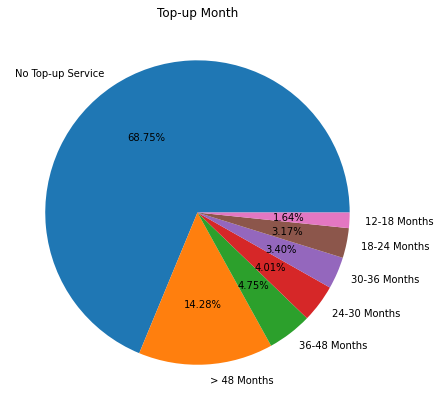

In [18]:
plt.subplots(figsize =(10,7))
pie = d_f['Top-up Month'].value_counts().plot.pie(autopct = '%1.2f%%')
pie.set_title('Top-up Month')
pie.set_ylabel('')

plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


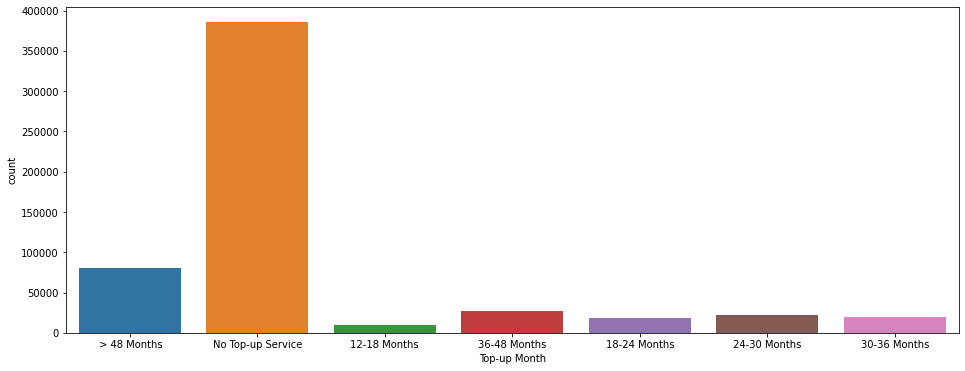

In [19]:
# Plot count of Top-up Month
plt.figure(figsize = (16,6))
sns.countplot('Top-up Month', data = d_f)
plt.show()

In [20]:
a = []
for i in final_data['Top-up Month'].unique():
  a.extend(str(i).split('|'))
  a = list(set(a))

print(a)

['12-18 Months', '36-48 Months', '30-36 Months', ' > 48 Months', '18-24 Months', '24-30 Months', 'No Top-up Service']


In [21]:
#Calculate the No Top-up Service percentage
print("No Top-up Month % in the org is::",(d_f['Top-up Month'].value_counts()['No Top-up Service']/d_f['Top-up Month'].count())*100)

No Top-up Month % in the org is:: 68.75423468914707


In [22]:
d_f1 = d_f.head(1000)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 35.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 56.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 25.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 68.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


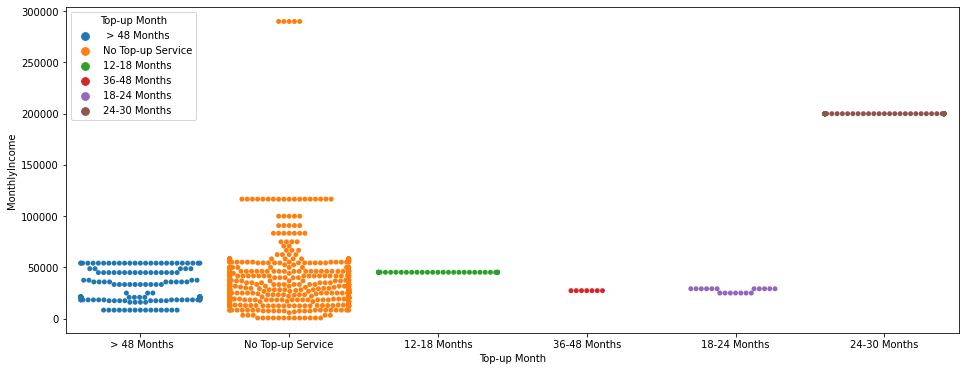

In [23]:
plt.figure(figsize = (16,6))
sns.swarmplot(y = 'MonthlyIncome', x = 'Top-up Month', data = d_f1, hue = 'Top-up Month')
plt.show()

In [24]:
#checking for dtypes
final_data.dtypes

ID                                    int64
Frequency                            object
InstlmentMode                        object
LoanStatus                           object
PaymentMode                          object
BranchID                              int64
Area                                 object
Tenure                                int64
AssetCost                             int64
AmountFinance                       float64
DisbursalAmount                     float64
EMI                                 float64
DisbursalDate                datetime64[ns]
MaturityDAte                 datetime64[ns]
AuthDate                     datetime64[ns]
AssetID                               int64
ManufacturerID                        int64
SupplierID                            int64
LTV                                 float64
SEX                                  object
AGE                                 float64
MonthlyIncome                       float64
City                            

In [25]:
d_f = d_f.dropna(how='any',axis=0) 
d_f.isnull().sum()

ID                           0
Frequency                    0
InstlmentMode                0
LoanStatus                   0
PaymentMode                  0
BranchID                     0
Area                         0
Tenure                       0
AssetCost                    0
AmountFinance                0
DisbursalAmount              0
EMI                          0
DisbursalDate                0
MaturityDAte                 0
AuthDate                     0
AssetID                      0
ManufacturerID               0
SupplierID                   0
LTV                          0
SEX                          0
AGE                          0
MonthlyIncome                0
City                         0
State                        0
ZiPCODE                      0
Top-up Month                 0
SELF-INDICATOR               0
MATCH-TYPE                   0
ACCT-TYPE                    0
CONTRIBUTOR-TYPE             0
DATE-REPORTED                0
OWNERSHIP-IND                0
ACCOUNT-

In [26]:
# Data preprocessing

In [27]:
#Converting 'Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole'
#'MaritalStatus', 'overtime'

In [28]:
def labelencoder(data_frame):
    temp_df = data_frame.copy()
    le = preprocessing.LabelEncoder()
    
    temp_df["Top-up Month"] = le.fit_transform(temp_df["Top-up Month"])
    temp_df["Frequency"] = le.fit_transform(temp_df["Frequency"])
    temp_df["InstlmentMode"] = le.fit_transform(temp_df["InstlmentMode"])
    temp_df["LoanStatus"] = le.fit_transform(temp_df["LoanStatus"])
    temp_df["PaymentMode"] = le.fit_transform(temp_df["PaymentMode"])
    temp_df["Area"] = le.fit_transform(temp_df["Area"])
    temp_df["AmountFinance"] = le.fit_transform(temp_df["AmountFinance"])
    temp_df["DisbursalAmount"] = le.fit_transform(temp_df["DisbursalAmount"])
    temp_df["EMI"] = le.fit_transform(temp_df["EMI"])
    temp_df["DisbursalDate"] = le.fit_transform(temp_df["DisbursalDate"])
    temp_df["MaturityDAte"] = le.fit_transform(temp_df["MaturityDAte"])
    temp_df["AuthDate"] = le.fit_transform(temp_df["AuthDate"])
    temp_df["LTV"] = le.fit_transform(temp_df["LTV"])
    temp_df["SEX"] = le.fit_transform(temp_df["SEX"])
    temp_df["AGE"] = le.fit_transform(temp_df["AGE"])
    temp_df["MonthlyIncome"] = le.fit_transform(temp_df["MonthlyIncome"])
    temp_df["City"] = le.fit_transform(temp_df["City"])
    temp_df["State"] = le.fit_transform(temp_df["State"])
    temp_df["ZiPCODE"] = le.fit_transform(temp_df["ZiPCODE"])
    temp_df["SELF-INDICATOR"] = le.fit_transform(temp_df["SELF-INDICATOR"])
    temp_df["MATCH-TYPE"] = le.fit_transform(temp_df["MATCH-TYPE"])
    temp_df["ACCT-TYPE"] = le.fit_transform(temp_df["ACCT-TYPE"])
    temp_df["CONTRIBUTOR-TYPE"] = le.fit_transform(temp_df["CONTRIBUTOR-TYPE"])
    temp_df["DATE-REPORTED"] = le.fit_transform(temp_df["DATE-REPORTED"])
    temp_df["OWNERSHIP-IND"] = le.fit_transform(temp_df["OWNERSHIP-IND"])
    temp_df["ACCOUNT-STATUS"] = le.fit_transform(temp_df["ACCOUNT-STATUS"])
    temp_df["DISBURSED-DT"] = le.fit_transform(temp_df["DISBURSED-DT"])
    temp_df["DISBURSED-AMT/HIGH CREDIT"] = le.fit_transform(temp_df["DISBURSED-AMT/HIGH CREDIT"])
    temp_df["CURRENT-BAL"] = le.fit_transform(temp_df["CURRENT-BAL"])
    temp_df["OVERDUE-AMT"] = le.fit_transform(temp_df["OVERDUE-AMT"])
    temp_df["WRITE-OFF-AMT"] = le.fit_transform(temp_df["WRITE-OFF-AMT"])
    temp_df["REPORTED DATE - HIST"] = le.fit_transform(temp_df["REPORTED DATE - HIST"])
    temp_df["DPD - HIST"] = le.fit_transform(temp_df["DPD - HIST"])
    temp_df["CUR BAL - HIST"] = le.fit_transform(temp_df["CUR BAL - HIST"])
    temp_df["AMT OVERDUE - HIST"] = le.fit_transform(temp_df["AMT OVERDUE - HIST"])
    temp_df["AMT PAID - HIST"] = le.fit_transform(temp_df["AMT PAID - HIST"])

    return temp_df

encoded_cap_data = labelencoder(d_f)

In [29]:
encoded_cap_data

,ID,Frequency,InstlmentMode,LoanStatus,PaymentMode,BranchID,Area,Tenure,AssetCost,AmountFinance,DisbursalAmount,EMI,DisbursalDate,MaturityDAte,AuthDate,AssetID,ManufacturerID,SupplierID,LTV,SEX,AGE,MonthlyIncome,City,State,ZiPCODE,Top-up Month,SELF-INDICATOR,MATCH-TYPE,ACCT-TYPE,CONTRIBUTOR-TYPE,DATE-REPORTED,OWNERSHIP-IND,ACCOUNT-STATUS,DISBURSED-DT,DISBURSED-AMT/HIGH CREDIT,CURRENT-BAL,OVERDUE-AMT,WRITE-OFF-AMT,REPORTED DATE - HIST,DPD - HIST,CUR BAL - HIST,AMT OVERDUE - HIST,AMT PAID - HIST
9,2,2,0,1,7,333,15,47,485000,6854,6642,761,404,232,387,4681175,1062,34802,5580,1,5,20,402,11,3933,6,0,0,37,9,1581,1,1,3878,8272,577,0,1,15314,68062,6782,3273,13
10,2,2,0,1,7,333,15,47,485000,6854,6642,761,404,232,387,4681175,1062,34802,5580,1,5,20,402,11,3933,6,0,0,37,9,1268,1,1,3562,37439,577,0,1,10794,68673,5339,2586,10
11,2,2,0,1,7,333,15,47,485000,6854,6642,761,404,232,387,4681175,1062,34802,5580,1,5,20,402,11,3933,6,0,0,20,9,2506,0,0,5218,31772,63990,0,1,39324,5,243639,23380,4
12,2,2,0,1,7,333,15,47,485000,6854,6642,761,404,232,387,4681175,1062,34802,5580,1,5,20,402,11,3933,6,0,0,3,7,2477,1,0,3920,50439,75561,0,1,38020,36,256828,32735,20044
13,2,2,0,1,7,333,15,47,485000,6854,6642,761,404,232,387,4681175,1062,34802,5580,1,5,20,402,11,3933,6,0,0,12,9,2477,1,0,4219,51091,41824,0,1,38020,36,221652,32736,21793
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
560837,143391,1,1,1,3,424,66,24,460000,3769,3661,17016,2347,431,2257,31295422,1568,48879,4572,1,7,7065,428,7,173,6,1,0,45,7,2506,1,0,4846,16411,86313,0,1,39879,17,271761,31336,16
560838,143393,2,1,0,3,424,66,23,545000,4507,4392,2171,2402,452,2309,32145629,1568,44118,3818,1,18,8880,428,7,159,6,1,0,45,7,2506,1,0,4908,21154,11426,0,1,39827,0,186692,31025,14
560840,143393,2,1,0,3,424,66,23,545000,4507,4392,2171,2402,452,2309,32145629,1568,44118,3818,1,18,8880,428,7,159,6,0,0,45,7,2477,1,0,4521,21133,577,0,1,37468,19991,66896,56860,25
560842,143394,1,1,0,3,424,66,35,350000,2880,2802,15242,2425,480,2332,32509866,1568,48879,3617,1,19,7105,428,7,166,6,1,0,45,7,2506,1,0,4935,14058,8884,0,1,39812,0,182996,30436,13


In [35]:
out_x = encoded_cap_data('ID')

TypeError: ignored

In [33]:
import statsmodels.api as sm

In [32]:
# Import the libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [34]:
# We now instatiate a Linear Regression object
lm = LinearRegression()

In [36]:
y = encoded_cap_data["Top-up Month"].values
X = encoded_cap_data.drop(["Top-up Month"],axis =1)

In [37]:
out_y = encoded_cap_data["Top-up Month"].values
out_X = encoded_cap_data["ID"].values

In [38]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=101)

In [39]:
## Let's chec the head of some of these splits
X_test.head()
# We see that they are randomly selected

,ID,Frequency,InstlmentMode,LoanStatus,PaymentMode,BranchID,Area,Tenure,AssetCost,AmountFinance,DisbursalAmount,EMI,DisbursalDate,MaturityDAte,AuthDate,AssetID,ManufacturerID,SupplierID,LTV,SEX,AGE,MonthlyIncome,City,State,ZiPCODE,SELF-INDICATOR,MATCH-TYPE,ACCT-TYPE,CONTRIBUTOR-TYPE,DATE-REPORTED,OWNERSHIP-IND,ACCOUNT-STATUS,DISBURSED-DT,DISBURSED-AMT/HIGH CREDIT,CURRENT-BAL,OVERDUE-AMT,WRITE-OFF-AMT,REPORTED DATE - HIST,DPD - HIST,CUR BAL - HIST,AMT OVERDUE - HIST,AMT PAID - HIST
244106,53020,1,1,1,10,141,51,24,631000,2675,2599,15835,1667,334,1605,20354138,1060,102821,2542,1,10,7941,149,14,365,0,0,37,6,2477,1,2,3924,5596,26719,13371,1,35843,90411,173796,123610,6360
204417,46723,2,1,1,7,85,57,26,530000,2675,2599,10891,385,145,368,4347121,1060,23549,3297,1,26,4782,313,0,4829,0,0,4,6,1194,1,0,1380,2633,9867,0,1,9801,93140,184482,67309,15
350919,82741,1,1,0,3,292,13,60,350000,3371,3290,6425,1826,503,1762,22814515,3473,126042,4866,1,32,1878,333,6,2654,0,0,12,7,2477,1,0,4550,5120,4570,0,1,36574,21049,176566,25688,38817
407200,98447,1,1,1,4,47,62,42,525000,9522,9245,15117,1081,311,1048,13890735,1186,34487,6129,1,30,3177,324,0,5527,0,0,24,6,2477,1,2,2715,9359,34514,15047,1,35801,90378,212004,126753,6328
294016,64852,3,1,1,4,166,79,24,480000,4426,4312,7848,995,235,966,13526586,1186,23409,3893,1,17,4868,417,7,102,1,0,45,7,1325,1,1,3250,21183,577,0,1,11782,44239,61764,105715,26


In [40]:
import statsmodels.api as sm

In [41]:
X_endog = sm.add_constant(X_test)
res = sm.OLS(y_test, X_endog)
res.fit()

In [42]:
res.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.076
Model:                            OLS   Adj. R-squared:                  0.076
Method:                 Least Squares   F-statistic:                     195.7
Date:                Sun, 07 Feb 2021   Prob (F-statistic):               0.00
Time:                        12:55:35   Log-Likelihood:            -2.1337e+05
No. Observations:               99691   AIC:                         4.268e+05
Df Residuals:                   99648   BIC:                         4.272e+05
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         5.8254      0.122     47.742      0.000       5.586       6.065
ID                         2.019e-07   2.11e-07      0.955      0.340   -2.13e-07    6.16e-07
Frequency                     0.0156      0.012      1.309      0.190      -0.008       0.039
InstlmentMode                -0.1385      0.039     -3.551      0.000      -0.215      -0.062
LoanStatus                    0.3963      0.020     20.248      0.000       0.358       0.435
PaymentMode                   0.0010      0.003      0.338      0.735      -0.005       0.007
BranchID                      0.0003   6.43e-05      4.259      0.000       0.000       0.000
Area                         -0.0045      0.000    -14.443      0.000      -0.005      -0.004
Tenure                       -0.0005      0.000     -1.300      0.194      -0.001       0.000
AssetCost                 -6.845e-07   9.68e-08     -7.074      0.000   -8.74e-07   -4.95e-07
AmountFinance             -2.373e-05   3.59e-05     -0.661      0.509   -9.41e-05    4.67e-05
DisbursalAmount            3.376e-05   3.75e-05      0.900      0.368   -3.98e-05       0.000
EMI                       -2.204e-07   1.61e-06     -0.137      0.891   -3.37e-06    2.93e-06
DisbursalDate                 0.0110      0.002      7.169      0.000       0.008       0.014
MaturityDAte                  0.0016      0.000      6.705      0.000       0.001       0.002
AuthDate                     -0.0105      0.002     -6.394      0.000      -0.014      -0.007
AssetID                   -3.568e-08   8.11e-09     -4.398      0.000   -5.16e-08   -1.98e-08
ManufacturerID            -1.171e-05   2.71e-05     -0.433      0.665   -6.47e-05    4.13e-05
SupplierID                -1.346e-07   2.14e-07     -0.629      0.529   -5.54e-07    2.85e-07
LTV                       -6.451e-05   8.89e-06     -7.255      0.000   -8.19e-05   -4.71e-05
SEX                          -0.2096      0.032     -6.521      0.000      -0.273      -0.147
AGE                          -0.0008      0.001     -1.371      0.170      -0.002       0.000
MonthlyIncome             -9.422e-05   3.32e-06    -28.343      0.000      -0.000   -8.77e-05
City                         -0.0005   5.41e-05     -8.843      0.000      -0.001      -0.000
State                         0.0087      0.001      6.618      0.000       0.006       0.011
ZiPCODE                   -8.614e-05   3.61e-06    -23.886      0.000   -9.32e-05   -7.91e-05
SELF-INDICATOR                0.3940      0.020     19.373      0.000       0.354       0.434
MATCH-TYPE                    0.1194      0.349      0.342      0.732      -0.564       0.803
ACCT-TYPE                     0.0017      0.001      3.201      0.001       0.001       0.003
CONTRIBUTOR-TYPE             -0.0130      0.005     -2.883      0.004      

In [43]:
X_endog_test = sm.add_constant(X_test)
model = res.fit()
predictions = model.predict(X_endog_test)

In [44]:
predictions

244106    5.269414
204417    4.464846
350919    4.960371
407200    4.837908
294016    5.232702
            ...   
62543     5.231990
419113    4.988990
47709     5.292878
260484    4.154540
290545    4.415421
Length: 99691, dtype: float64

In [52]:
output = d_f
output.tail(10)

,ID,Frequency,InstlmentMode,LoanStatus,PaymentMode,BranchID,Area,Tenure,AssetCost,AmountFinance,DisbursalAmount,EMI,DisbursalDate,MaturityDAte,AuthDate,AssetID,ManufacturerID,SupplierID,LTV,SEX,AGE,MonthlyIncome,City,State,ZiPCODE,Top-up Month,SELF-INDICATOR,MATCH-TYPE,ACCT-TYPE,CONTRIBUTOR-TYPE,DATE-REPORTED,OWNERSHIP-IND,ACCOUNT-STATUS,DISBURSED-DT,DISBURSED-AMT/HIGH CREDIT,CURRENT-BAL,OVERDUE-AMT,WRITE-OFF-AMT,REPORTED DATE - HIST,DPD - HIST,CUR BAL - HIST,AMT OVERDUE - HIST,AMT PAID - HIST
560831,143389,Quatrly,Arrear,Closed,Direct Debit,416,MANDLA,12,650000,200000.0,200000.0,54370.0,2019-01-18,2019-12-05,2019-01-18,32884728,1568,85912,30.77,M,39.0,69083.33,MANDLA,MADHYA PRADESH,481661.0,18-24 Months,True,PRIMARY,Tractor Loan,NBF,2020-01-31,Individual,Closed,2019-01-18,"2,00,000",0,0,0.0,"20200131,20191201,20191130,20191031,20190930,2...",000DDD000000000000000000000000000000000,"0,,52153,52153,52153,102179,102179,102179,1501...","0,,0,0,0,0,0,0,0,0,0,0,0",",,,,,,,,,,,,,,"
560832,143389,Quatrly,Arrear,Closed,Direct Debit,416,MANDLA,12,650000,200000.0,200000.0,54370.0,2019-01-18,2019-12-05,2019-01-18,32884728,1568,85912,30.77,M,39.0,69083.33,MANDLA,MADHYA PRADESH,481661.0,18-24 Months,False,PRIMARY,Commercial Vehicle Loan,NBF,2019-12-31,Guarantor,Active,2019-09-27,"1,60,810","1,07,545",0,0.0,"20191231,20191130,20191031,20190930,",000000000000,"107545,122589,135910,112608,","0,0,0,0,","17600,16600,10000,14900,"
560833,143389,Quatrly,Arrear,Closed,Direct Debit,416,MANDLA,12,650000,200000.0,200000.0,54370.0,2019-01-18,2019-12-05,2019-01-18,32884728,1568,85912,30.77,M,39.0,69083.33,MANDLA,MADHYA PRADESH,481661.0,18-24 Months,False,PRIMARY,Two-Wheeler Loan,NBF,2019-12-31,Individual,Active,2017-02-28,"51,266",0,0,0.0,"20191231,20191130,20191031,20190930,20190831,2...",000000000000000000000000000000DDD0000540540850...,"0,0,0,0,0,0,0,0,0,0,,4148,11598,14399,20154,19...","0,0,0,0,0,0,0,0,0,0,,0,3830,4140,7450,4760,507...",",,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,"
560835,143390,Half Yearly,Arrear,Closed,Direct Debit,424,PANIPAT,24,470000,265601.0,265601.0,76800.0,2018-09-21,2020-06-05,2018-09-22,31286914,1568,48879,40.17,M,25.0,65333.33,SONIPAT,HARYANA,131403.0,24-30 Months,True,PRIMARY,Tractor Loan,NBF,2020-01-31,Individual,Active,2018-09-21,"2,65,601","71,057",0,0.0,"20200131,20191231,20191130,20191031,20190930,2...",0000000000000000000000000000000000000000000000...,"71057,71057,136800,136800,136800,136800,136800...","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,",",,,,,,,,,,,,,,,,,"
560836,143390,Half Yearly,Arrear,Closed,Direct Debit,424,PANIPAT,24,470000,265601.0,265601.0,76800.0,2018-09-21,2020-06-05,2018-09-22,31286914,1568,48879,40.17,M,25.0,65333.33,SONIPAT,HARYANA,131403.0,24-30 Months,False,PRIMARY,Property Loan,PRB,2019-12-31,Individual,Active,2019-08-31,"18,22,000","17,96,573",0,0.0,"20191231,20191130,20191031,20190930,",000000000000,"1796573,1805126,1813602,1822000,","0,0,0,0,",",,,,"
560837,143391,Half Yearly,Arrear,Closed,Direct Debit,424,PANIPAT,24,460000,275630.0,275630.0,80100.0,2018-09-22,2020-06-05,2018-09-22,31295422,1568,48879,59.92,M,25.0,83333.33,SONIPAT,HARYANA,131403.0,No Top-up Service,True,PRIMARY,Tractor Loan,NBF,2020-01-31,Individual,Active,2018-09-22,"2,75,630","73,890",0,0.0,"20200131,20191231,20191130,20191031,20190930,2...",0000000000000000000000000000000000000000000000...,"73890,73890,142050,142050,142050,142050,142050...","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,",",,,,,,,,,,,,,,,,,"
560838,143393,Monthly,Arrear,Active,Direct Debit,424,PANIPAT,23,545000,300733.0,300733.0,15277.0,2018-11-23,2020-11-05,2018-11-23,32145629,1568,44118,52.38,M,36.0,248500.00,SONIPAT,HARYANA,131024.0,No Top-up Service,True,PRIMARY,Tractor Loan,NBF,2020-01-31,Individual,Active,2018-11-23,"3,0,733","1,42,446",0,0.0,"20200131,20191231,20191130,20191031,20190930,2...",0,"142446,155709,168804,181731,194494,207093,2070...","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,",",,,,,,,,,,,,,,,"
560840,143393,Monthly,Arrear,Active,Direct Debit,424,PANIPAT,23,545000,3007

In [69]:
output.isnull().sum()

ID                           0
Frequency                    0
InstlmentMode                0
LoanStatus                   0
PaymentMode                  0
BranchID                     0
Area                         0
Tenure                       0
AssetCost                    0
AmountFinance                0
DisbursalAmount              0
EMI                          0
DisbursalDate                0
MaturityDAte                 0
AuthDate                     0
AssetID                      0
ManufacturerID               0
SupplierID                   0
LTV                          0
SEX                          0
AGE                          0
MonthlyIncome                0
City                         0
State                        0
ZiPCODE                      0
Top-up Month                 0
SELF-INDICATOR               0
MATCH-TYPE                   0
ACCT-TYPE                    0
CONTRIBUTOR-TYPE             0
DATE-REPORTED                0
OWNERSHIP-IND                0
ACCOUNT-

In [70]:
output.drop(['Frequency','InstlmentMode','LoanStatus','PaymentMode','BranchID','Area','Tenure','AssetCost','AmountFinance','DisbursalAmount','EMI','DisbursalDate','MaturityDAte','AuthDate','AssetID','ManufacturerID','SupplierID','LTV','SEX','AGE','MonthlyIncome','City','State','ZiPCODE','SELF-INDICATOR','MATCH-TYPE','ACCT-TYPE','CONTRIBUTOR-TYPE','DATE-REPORTED','OWNERSHIP-IND','ACCOUNT-STATUS','DISBURSED-DT','DISBURSED-AMT/HIGH CREDIT','CURRENT-BAL','OVERDUE-AMT','WRITE-OFF-AMT','REPORTED DATE - HIST','DPD - HIST','CUR BAL - HIST','AMT OVERDUE - HIST','AMT PAID - HIST'], axis=1, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [71]:
output.head(100)

,ID,Top-up Month
9,2,No Top-up Service
10,2,No Top-up Service
11,2,No Top-up Service
12,2,No Top-up Service
13,2,No Top-up Service
...,...,...
206,35,No Top-up Service
207,35,No Top-up Service
208,35,No Top-up Service
209,35,No Top-up Service


In [72]:
output1.columns

Index(['ID', 'Top-up Month'], dtype='object')

In [73]:
output1.shape

(332302, 2)

In [74]:
import numpy as np
output['ID'] = np.arange(0,332302,1)
output

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,ID,Top-up Month
9,0,No Top-up Service
10,1,No Top-up Service
11,2,No Top-up Service
12,3,No Top-up Service
13,4,No Top-up Service
...,...,...
560837,332297,No Top-up Service
560838,332298,No Top-up Service
560840,332299,No Top-up Service
560842,332300,No Top-up Service


In [75]:
d_f.to_csv("data.csv", index = False) 

In [76]:
! cat data.csv

Streaming output truncated to the last 5000 lines.
118951,No Top-up Service
118952,No Top-up Service
118953,No Top-up Service
118954,No Top-up Service
118955,No Top-up Service
118956,No Top-up Service
118957,No Top-up Service
118958,No Top-up Service
118959,No Top-up Service
118960,No Top-up Service
118961,No Top-up Service
118962,No Top-up Service
118963,No Top-up Service
118964,No Top-up Service
118965,No Top-up Service
118966,No Top-up Service
118967,No Top-up Service
118968,No Top-up Service
118969,No Top-up Service
118970,No Top-up Service
118971,No Top-up Service
118972, > 48 Months
118973, > 48 Months
118974, > 48 Months
118975, > 48 Months
118976, > 48 Months
118977, > 48 Months
118978,No Top-up Service
118979,No Top-up Service
118980,No Top-up Service
118981,No Top-up Service
118982,No Top-up Service
118983,No Top-up Service
118984,No Top-up Service
118985,No Top-up Service
118986, > 48 Months
118987, > 48 Months
118988, > 48 Months
118989, > 48 Months
118990, > 48 Months
1189

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

